In [7]:
# In this part(final part), the free energy is computed for a "2 part" run (e.g going backward then forward)

# The free energy is computed using EMUS PMF

# The github repo for EMUS is https://github.com/ehthiede/EMUS

# Their AlaDipeptide_1D example demonstrates many EMUS features

import sys, os, os.path
import glob

import scipy as sp
import numpy as np

from emus import usutils as uu
from emus import emus, avar


import matplotlib
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

from tempfile import TemporaryFile


%pylab inline



# Additonal EMUS parameters should be set here
period=None
dim=1
T=0.01
k_B=1

Populating the interactive namespace from numpy and matplotlib


In [24]:
#prepare collective varrible trajectories (samples) and umbrella biasing functions (psi) for emus
meta_file_1 = 'ONE_TO_074_META.txt'         # Path to Meta File
psis_1, cv_trajs_1, neighbors_1 = uu.data_from_meta(
    meta_file_1, dim, T=T, k_B=k_B, period=period)

In [25]:
meta_file_2 = '074_TO_ONE_META.txt'         # Path to Meta File
psis_2, cv_trajs_2, neighbors_2 = uu.data_from_meta(
    meta_file_2, dim, T=T, k_B=k_B, period=period)

In [31]:
# compute one iteration of emus, typically MANY iterations are needed
z, F = emus.calculate_zs(psis=psis_1, neighbors=neighbors_1)

Text(0.5, 1.0, '1.0 to 0.74')

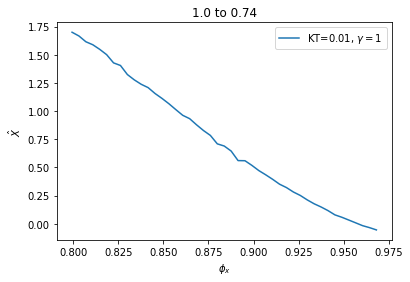

In [34]:
# Calculate the PMF from EMUS
cv_trajs=cv_trajs_1
psis=psis_1
nbins = 60                          # Number of Histogram Bins.
kT=k_B*T
domain = ((0.74, 0.97))  
pmf, edges = emus.calculate_pmf(
    cv_trajs, psis, domain, z, nbins=nbins, kT=kT, use_iter=False)   # Calculate the pmf
pmf_centers = (edges[0][1:]+edges[0][:-1])/2.0
pp.figure()
pp.plot(pmf_centers, pmf, label='EMUS PMF')
pp.legend(['KT=0.01, $\gamma=1$'])
pp.xlabel('$\phi_x$')
pp.ylabel('$\hat{X}$')
pp.title('1.0 to 0.74')

In [ ]:
# Calculate z using the MBAR type iteration.
# error messages sometimes appear when data overlaps "too much" or not "enough" in some regions such that 
# the overlap matrix F is poorly conditioned
# This is difficult to avoid, so it is important to make sure iterations converge

#z_iter_25, F_iter_25 = emus.calculate_zs(psis, n_iter=25)
z_iter_50_1, F_iter_50_1 = emus.calculate_zs(psis_1, n_iter=50)
#z_iter_100_1, F_iter_100_1 = emus.calculate_zs(psis=psis_1, n_iter=100)
#z_iter_100_2, F_iter_100_2 = emus.calculate_zs(psis=psis_2, n_iter=100)
z_iter_350_1, F_iter_350_1 = emus.calculate_zs(psis_1, n_iter=350)
z_iter_350_2, F_iter_350_2 = emus.calculate_zs(psis_1, n_iter=350)

#z_iter_1k, F_iter_1k = emus.calculate_zs(psis, n_iter=1000)

/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.05877e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.41981e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.05941e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.42046e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcon

/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.05913e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.42018e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.42014e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.42017e-71): result may not be accurate.
  z = solve(ImFt, Fi)  # Partition fxns of the other states.
/home/kevinluna/anaconda3/lib/python3.7/site-packages/emus/linalg.py:73: LinAlgWarning: Ill-conditioned matrix (rcon

Text(0.5, 1.0, '1.0 to 0.74')

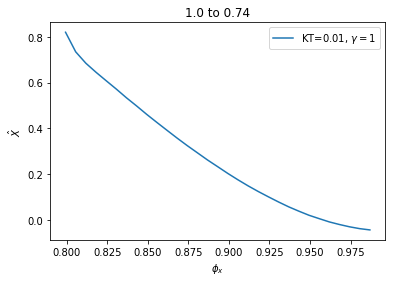

In [36]:
nbins = 40                          # Number of Histogram Bins.
kT=k_B*T
domain = ((0.74, 0.99))  
iterpmf, edges = emus.calculate_pmf(
    cv_trajs_1, psis_1, domain, nbins=nbins, z=z_iter_100_1, kT=kT)
pmf_centers_iter = (edges[0][1:]+edges[0][:-1])/2.
pp.plot(pmf_centers_iter, iterpmf, label='Iter EMUS PMF')
pp.legend(['KT=0.01, $\gamma=1$'])
pp.xlabel('$\phi_x$')
pp.ylabel('$\hat{X}$')
pp.title('1.0 to 0.74')

Text(0.5, 1.0, '0.74 to 1.0')

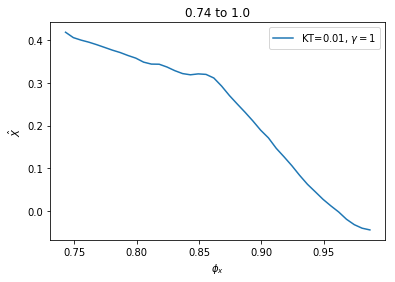

In [37]:
nbins = 40                          # Number of Histogram Bins.
kT=k_B*T
domain = ((0.74, 0.99))  
iterpmf, edges = emus.calculate_pmf(
    cv_trajs_2, psis_2, domain, nbins=nbins, z=z_iter_100_2, kT=kT)
pmf_centers_iter = (edges[0][1:]+edges[0][:-1])/2.
pp.plot(pmf_centers_iter, iterpmf, label='Iter EMUS PMF')
pp.legend(['KT=0.01, $\gamma=1$'])
pp.xlabel('$\phi_x$')
pp.ylabel('$\hat{X}$')
pp.title('0.74 to 1.0')

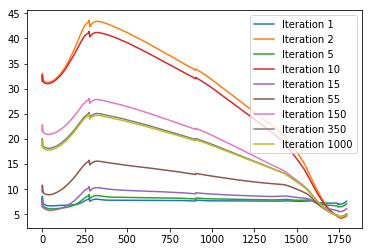

In [39]:
# bellow is an example of checking the convergence of a run
a,=pp.plot(-np.log(z_iter_1),label="Iteration 1")
b,=pp.plot(-np.log(z_iter_2),label="Iteration 2")
c,=pp.plot(-np.log(z_iter_5),label="Iteration 5")
d,=pp.plot(-np.log(z_iter_10),label="Iteration 10")
e,=pp.plot(-np.log(z_iter_15),label="Iteration 15")
f,=pp.plot(-np.log(z_iter_55),label="Iteration 55")
h,=pp.plot(-np.log(z_iter_150),label="Iteration 150")
j,=pp.plot(-np.log(z_iter_350),label="Iteration 350")
k,=pp.plot(-np.log(z_iter_1000),label="Iteration 1000")
pp.legend(handles=[a, b, c,d,e,f,h,j,k])
pp.show()